[('ozone', 84), ('note', 30), ('layer', 25), ('radiation', 17), ('stratosphere', 15), ('earth', 14), ('ultraviolet', 14), ('dobson', 13), ('oxygen', 12), ('atmosphere', 12), ('surface', 11), ('redirect', 11), ('skin', 9), ('depletion', 9), ('oxide', 7), ('circulation', 7), ('sun', 7), ('cancer', 6), ('udes', 6), ('wavelength', 6), ('galex', 6), ('chlorofluorocarbon', 6), ('chlorofluorocarbons', 5), ('light', 5), ('hole', 5)]


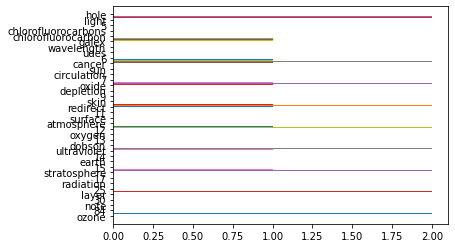

In [2]:
import urllib.request as ur
from bs4 import BeautifulSoup
import operator
from matplotlib import pyplot as plt

def get_content(article_name):
    s = ur.urlopen(f'https://en.wikipedia.org/wiki/{article_name}')
    sl = s.read()
    return sl

def merge_contents(data):
    soup = BeautifulSoup(data, features="html.parser")
    ls = soup.find_all("title")
    ls.append(soup.find_all("p"))
    return  str(ls)

def tokenize(content):
    list_of_splitters = [ "-", ",", "\t", "  ", ">", "<", "'", '"', "\n", "/", "_", '’', ')', '(', '{', '}', '%', ' ',
                          'the', 'it', '=', '.', '#', '[', ']', ':']
    new_content = "".join(content)
    for i in list_of_splitters:
        new_content = new_content.replace(i, " ")
    return new_content

def lower_collection(collection):
    return collection.lower()

def count_frequency(collection):
    dict = {}
    #new_col = collection.split()
    uniques = set(collection)
    for unique in uniques:
        if len(unique) > 2:
            dict[unique] = collection.count(unique)
    return dict

def print_most_frequent(frequencies, n):
    sorted_frequencies = sorted(frequencies.items(), key=operator.itemgetter(1), reverse=True)
    return  list(sorted_frequencies)[:n]

def plotting(frequencies):
    plt.hist(frequencies, orientation="horizontal")
    plt.show()

def remove_stop_words(words, stop_words):
    new_list = []
    new_words = words.split()
    for i in new_words:
        if i not in stop_words:
            new_list.append(i)
    return new_list

data = get_content("Ozone_layer")
merge_content = merge_contents(data)
collection = tokenize(merge_content)
collection = lower_collection(collection)
stop_words = [ "the", "a", "of", "to", "in", "about", "and", "however", "or", 'href', 'sup', 'wiki', 'ref',
               'reference', 'that', 'from', 'was', 'were', 'is', 'are', 'for', 'this', 'that', 'class', 'sub',
               'have', 'because', 'span', 'which', 'aph', 'into', 'cfcs', 'has', 'most', 'out', 'lat', 'all',
               'can', 'could', 'may', 'might', 'should', 'being', 'parser', '000', 'output', 'over', 'although'
               'nor', 'between']
new_collection = remove_stop_words(collection, stop_words)
frequencies = count_frequency(new_collection)
most_frequencies = print_most_frequent(frequencies, 25)
print(most_frequencies)
plotting(most_frequencies)